In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame = False)

/Users/i.khazratovvgmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

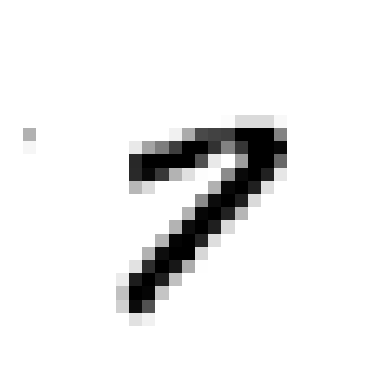

In [4]:
from matplotlib import pyplot as plt


def image_of_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

image_of_digit(X[29])

In [5]:
#Creating a test set and setting it aside
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
#Training a binary classifier for only one digit for now. Let's take 8
y_train_8 = (y_train == '8')
y_test_8 = (y_test == '8')

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=101)
sgd_clf.fit(X_train,y_train_8)

SGDClassifier(random_state=101)

In [8]:
n = 17
print(sgd_clf.predict([X_train[n]]),y_train[n])

[ True] 8


In [9]:
#Evaluating Model Performance 
# Accuracy is not very well for classification tasks so we use Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv = 3)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[51420,  2729],
       [ 2629,  3222]])

In [11]:
#Precision and Recall for better evaluation
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_8,y_train_pred), recall_score(y_train_8,y_train_pred))

0.5414216098134768 0.5506750982737993


In [12]:
#To combine both precision and recall we use F1 score for single metric

from sklearn.metrics import f1_score
f1_score(y_train_8,y_train_pred)

0.5460091509913574

In [14]:
# Now let's start Multiclass Classifiers
# SVC (Support vectors machine classifier)
from sklearn.svm import SVC
svc_clf = SVC(random_state=101)
svc_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=101)

In [18]:
print(svc_clf.predict([X_train[1111]]),y_train[1111])

['5'] 5


In [19]:
#let's use simple SGD classifier
sgd_clf_mult = SGDClassifier(random_state=101)
sgd_clf_mult.fit(X_train,y_train)
print(sgd_clf_mult.predict([X_train[101]]),y_train[101])

['7'] 7


In [22]:
y_pred_all = cross_val_predict(sgd_clf_mult,X_train,y_train,cv=3)


array([[5461,    1,   36,   11,   10,   41,   17,   22,   28,   18],
       [   1, 6486,   58,   22,   29,   21,   15,   25,  114,   25],
       [ 100,   44, 5176,  206,   87,   65,   69,   81,  154,   37],
       [  26,   42,  198, 5287,   80,  359,   11,  104,  398,  143],
       [   1,    6,   36,    2, 4562,   23,   14,   34,    8,   50],
       [ 118,   23,   43,  276,  121, 4413,  141,   34,  378,  106],
       [  78,   10,   83,   23,   82,  122, 5587,    6,   48,    6],
       [  13,    5,   78,   39,   48,   26,    6, 5617,   16,  269],
       [  98,  107,  228,  167,  183,  265,   52,   71, 4597,  150],
       [  27,   18,   22,   98,  640,   86,    6,  271,  110, 5145]])

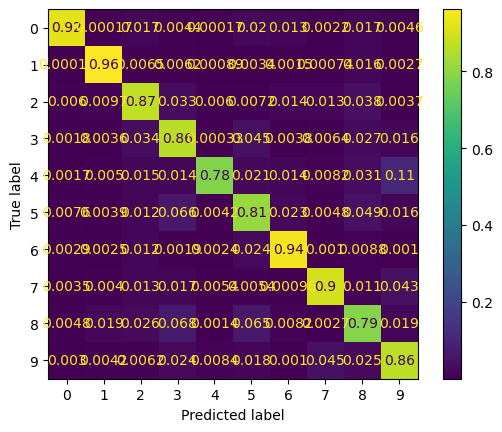

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_all,normalize = 'true')
plt.show()

In [29]:
#Multilabel Classifiers
import numpy as np
y_large = (y_train > '7')
y_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_large,y_odd]


60000

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [33]:
print(knn_clf.predict([X_train[233]]),y_train[233])

[[False False]] 2


In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.predict([X_train[101]]),y_train[101])

['7'] 7


In [39]:
y_pred = cross_val_predict(knn,X_train,y_train, cv = 3,)


TypeError: cross_val_predict() got an unexpected keyword argument 'avarage'

In [43]:
f1_score(y_train,y_pred, average = 'weighted')

0.9673453023960278